In [35]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/quora-pairs/quora_train.csv
/kaggle/input/quora-pairs/quora_test.csv


In [36]:
## import packages

import os
import re
import csv
import codecs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from subprocess import check_output
%matplotlib inline

In [37]:
TRAIN_DATA_FILE = '../input/quora-pairs/quora_train.csv'
TEST_DATA_FILE = '../input/quora-pairs/quora_test.csv'

print(check_output(["ls", "../input"]).decode("utf8"))
df_train = pd.read_csv(TRAIN_DATA_FILE, encoding = 'utf-8').fillna("")
df_test = pd.read_csv(TEST_DATA_FILE)

quora-pairs



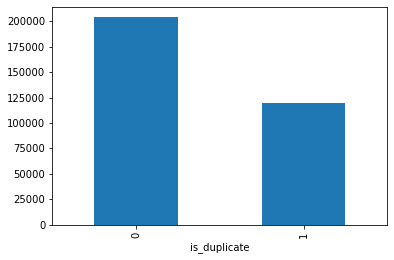

In [38]:
df_train.groupby("is_duplicate")['id'].count().plot.bar()

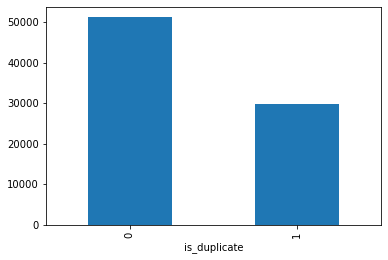

In [39]:
df_test.groupby("is_duplicate")['id'].count().plot.bar()

mean-train 11.06 std-train 5.89 mean-test 11.07 std-test 5.88 max-train 237.00 max-test 237.00


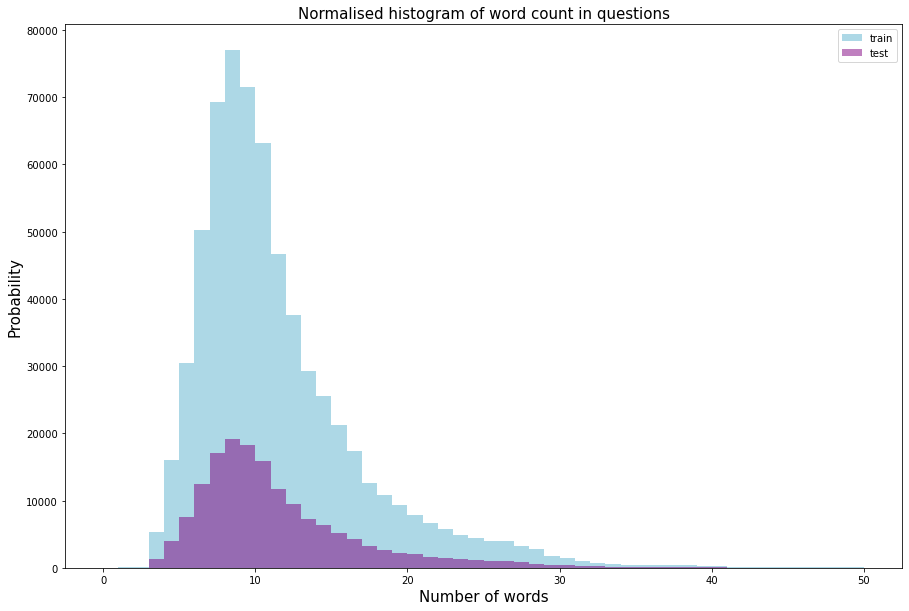

In [40]:
train_qs = pd.Series(df_train['question1'].tolist() + df_train['question2'].tolist()).astype(str)
test_qs = pd.Series(df_test['question1'].tolist() + df_test['question2'].tolist()).astype(str)

dist_train = train_qs.apply(lambda x: len(x.split(' ')))
dist_test = test_qs.apply(lambda x: len(x.split(' ')))

plt.figure(figsize=(15, 10))
plt.hist(dist_train, bins=50, range=[0, 50], color='lightblue', label='train')
plt.hist(dist_test, bins=50, range=[0, 50], color='purple', alpha=0.5, label='test')
plt.title('Normalised histogram of word count in questions', fontsize=15)
plt.legend()
plt.xlabel('Number of words', fontsize=15)
plt.ylabel('Probability', fontsize=15)

print('mean-train {:.2f} std-train {:.2f} mean-test {:.2f} std-test {:.2f} max-train {:.2f} max-test {:.2f}'.format(dist_train.mean(), 
                          dist_train.std(), dist_test.mean(), dist_test.std(), dist_train.max(), dist_test.max()))

In [41]:
df_train['q1len'] = df_train['question1'].str.len()
df_train['q2len'] = df_train['question2'].str.len()

df_train['q1_n_words'] = df_train['question1'].apply(lambda row: len(row.split(" ")))
df_train['q2_n_words'] = df_train['question2'].apply(lambda row: len(row.split(" ")))

def normalized_word_share(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return 1.0 * len(w1 & w2)/(len(w1) + len(w2))


df_train['word_share'] = df_train.apply(normalized_word_share, axis=1)

df_train.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1len,q2len,q1_n_words,q2_n_words,word_share
0,195840,386541,386542,How does banning 500 & 1000 rupee notes solve ...,Will the ban on 500 & 1000 rupee notes really ...,1,66,70,12,13,0.200000
1,252241,496583,496584,What is the hardest thing(s) about raising chi...,What is the hardest thing(s) about raising chi...,0,63,62,10,10,0.450000
2,249224,490718,490719,Who are Utopia's top competitors?,Who are Axis 41's top competitors?,0,33,34,5,6,0.363636
3,125536,248723,248724,I want to improve my reading skill by reading ...,How can reading newspaper help me improve my E...,0,115,53,19,9,0.111111
4,390237,762803,762804,How do I gain weight in naturally way?,How to gain weight ?,1,38,20,8,5,0.230769


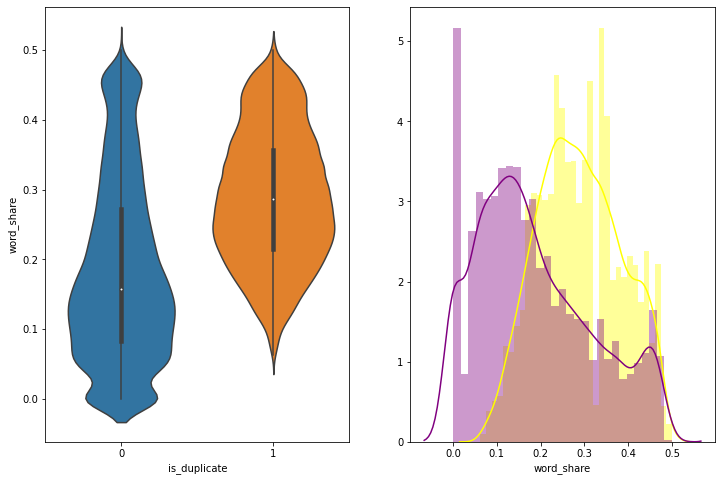

In [49]:
plt.figure(figsize=(12, 8))
plt.subplot(1,2,1)
sns.violinplot(x = 'is_duplicate', y = 'word_share', data = df_train[0:50000])
plt.subplot(1,2,2)
sns.distplot(df_train[df_train['is_duplicate'] == 1.0]['word_share'][0:10000], color = 'blue')
sns.distplot(df_train[df_train['is_duplicate'] == 0.0]['word_share'][0:10000], color = 'purple')